In [13]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train = ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

train_generator =train.flow_from_directory(
    'Mango_split/train',
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse'
)

Found 681 images belonging to 3 classes.


In [15]:
class_names = list(train_generator.class_indices.keys())
class_names

['OverRipe', 'Ripe', 'UnRipe']

In [16]:
validation= ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

val_generator =validation.flow_from_directory(
    'Mango_split/val',
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse',
)

Found 97 images belonging to 3 classes.


In [17]:
test = ImageDataGenerator(
    rescale =1./255,
    horizontal_flip =True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

test_generator =test.flow_from_directory(
    'Mango_split/test',
    target_size=(256,256),
    batch_size=32,
    class_mode='sparse',
)

Found 197 images belonging to 3 classes.


In [18]:
input_shape=(256,256,3)
n_classes= 3

model= models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size =(3,3), activation='relu'), #32filters, relu activation
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(), #flattens to 1d array
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
print(len(train_generator))


22


In [22]:
history= model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    batch_size=32,
    validation_data= val_generator,
    validation_steps= 3,
    verbose=1,
    epochs=10 
)

Epoch 1/10


22/22 [==============================] - 46s 2s/step - loss: 0.3801 - accuracy: 0.9354 - val_loss: 0.2723 - val_accuracy: 0.9375
Epoch 2/10
22/22 [==============================] - 38s 2s/step - loss: 0.2961 - accuracy: 0.9354 - val_loss: 0.2697 - val_accuracy: 0.9375
Epoch 3/10
22/22 [==============================] - 42s 2s/step - loss: 0.3319 - accuracy: 0.9354 - val_loss: 0.2776 - val_accuracy: 0.9375
Epoch 4/10
22/22 [==============================] - 38s 2s/step - loss: 0.2686 - accuracy: 0.9354 - val_loss: 0.2002 - val_accuracy: 0.9375
Epoch 5/10
22/22 [==============================] - 42s 2s/step - loss: 0.2004 - accuracy: 0.9471 - val_loss: 0.0902 - val_accuracy: 0.9688
Epoch 6/10
22/22 [==============================] - 37s 2s/step - loss: 0.2140 - accuracy: 0.9486 - val_loss: 0.1641 - val_accuracy: 0.9688
Epoch 7/10
22/22 [==============================] - 42s 2s/step - loss: 0.1947 - accuracy: 0.9515 - val_loss: 0.1240 - val_accuracy: 0.9583
Epoch 8/10
22/22 [

In [23]:
scores=model.evaluate(test_generator)

7/7 [==============================] - 8s 1s/step - loss: 0.1929 - accuracy: 0.9442


In [24]:
acc=history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

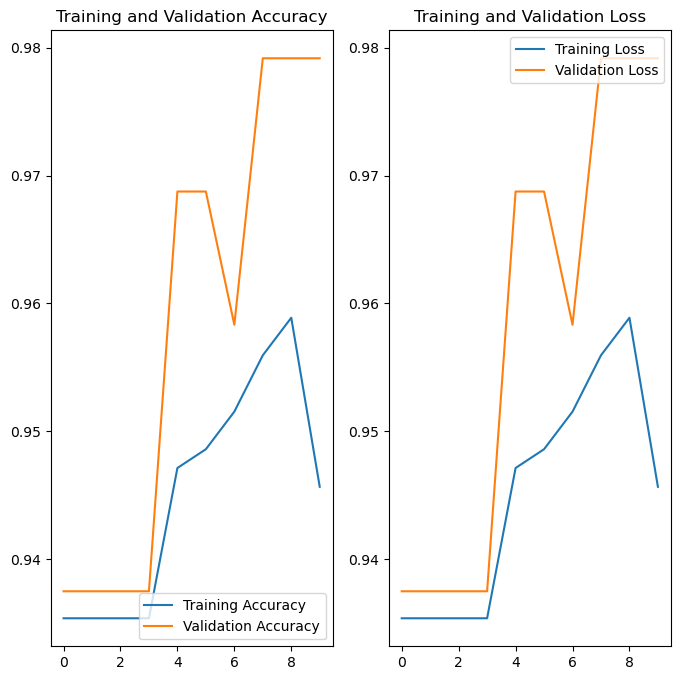

In [25]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(10), acc, label='Training Loss')
plt.plot(range(10),val_acc, label='Validation Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

first image to predict
actual label: UnRipe
1/1 [==============================] - 1s 629ms/step
predicted label: UnRipe


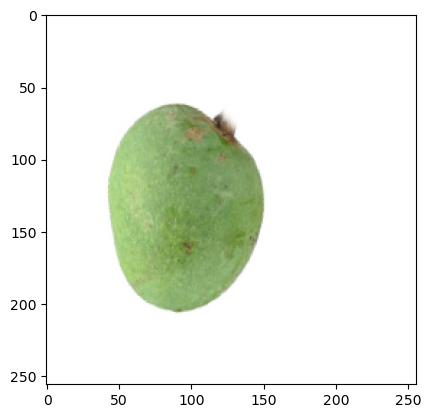

In [26]:
import numpy as np
for image_batch, label_batch in test_generator:
    first_image= image_batch[0]
    first_label = int(label_batch[0])
    
    print('first image to predict' )
    plt.imshow(first_image)
    print('actual label:', class_names[first_label])
    
    batch_prediction= model.predict(image_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])
    
    break
    

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 56ms/step


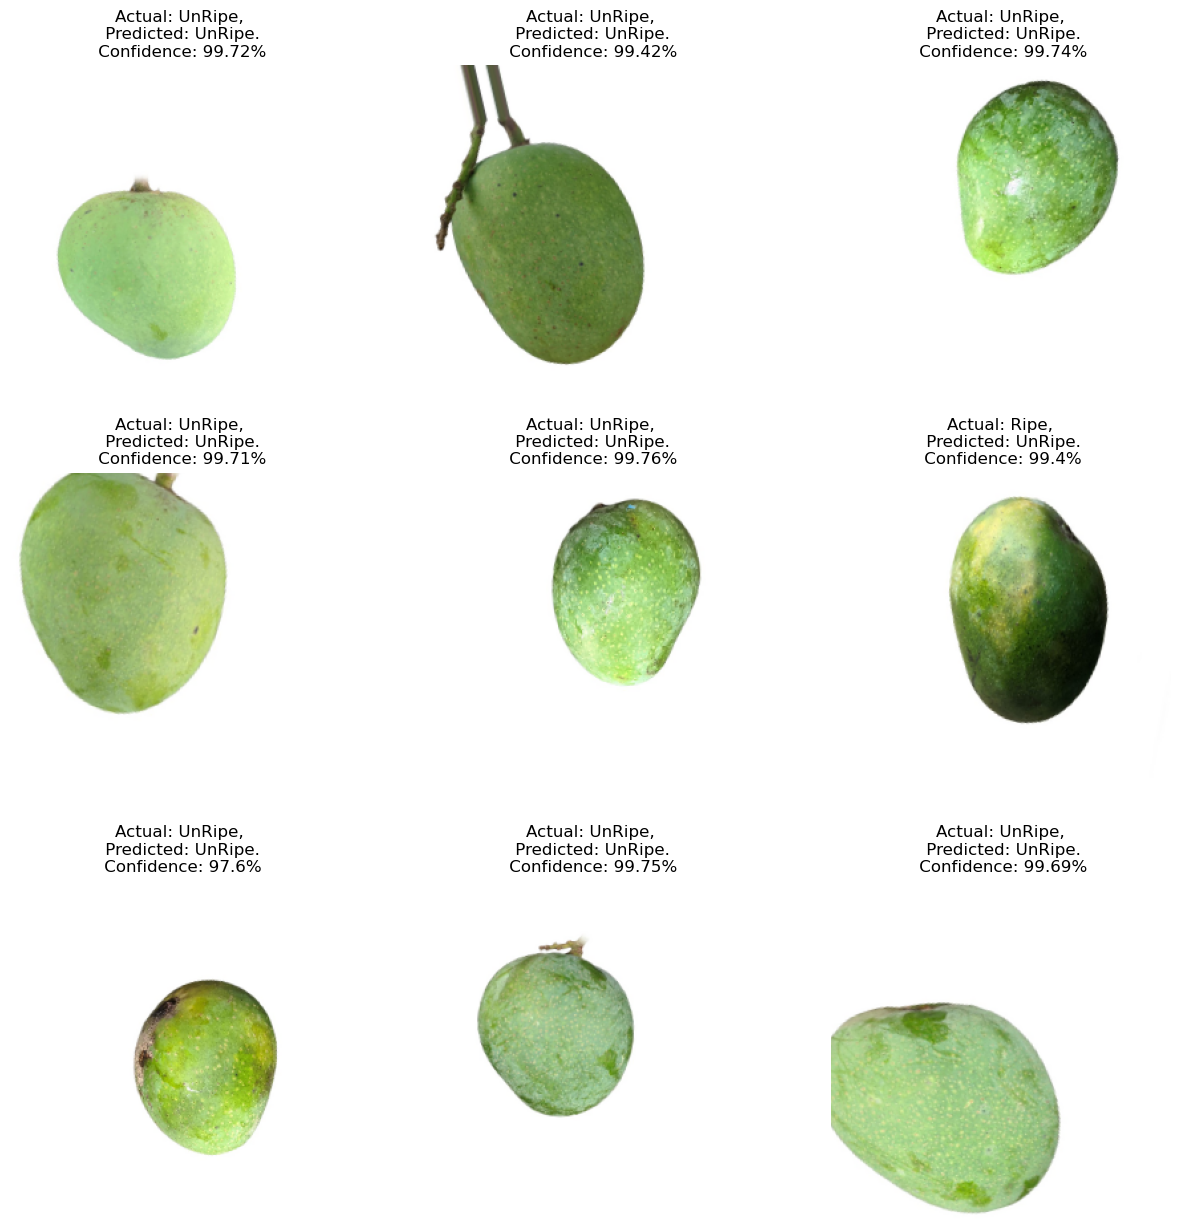

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

1/1 [==============================] - 0s 63ms/step


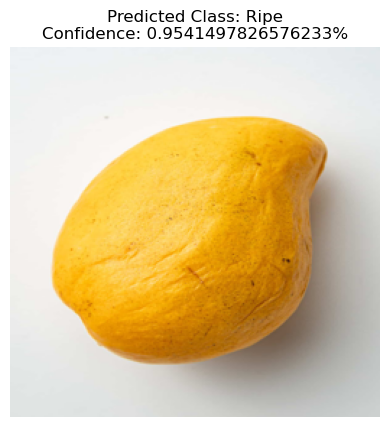

In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256)) 
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  
    return img_array, img

def predict(model, img_array, threshold=0.5):
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_index]

    if confidence < threshold:
        return "Unknown", confidence
    else:
        predicted_class = class_names[predicted_class_index]
        return predicted_class, confidence


image_path = 'test-images/ripe.jpg'
img_array, img = load_and_preprocess_image(image_path)
predicted_class, confidence = predict(model, img_array)

plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class}\nConfidence: {confidence}%")
plt.axis("off")
plt.show()
